# Regaration Model
# Predaction Price for Area


In [51]:
import pandas as pd
import numpy as np
%matplotlib inline

In [67]:
df=pd.read_csv('price_single.csv')

In [68]:
df

,area,prices
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   prices  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [70]:
from sklearn import linear_model
import matplotlib.pyplot as plt

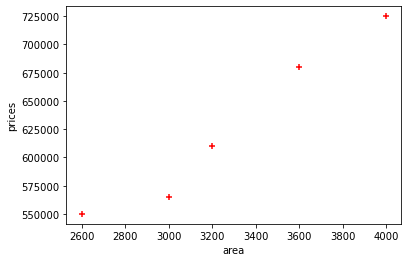

In [71]:
plt.xlabel('area')
plt.ylabel('prices')
plt.scatter(df.area,df.prices,color='red',marker='+')

In [72]:
area=df.area
area

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

In [73]:
prices=df.prices
prices

0    550000
1    565000
2    610000
3    680000
4    725000
Name: prices, dtype: int64

In [91]:
from sklearn import linear_model
import matplotlib.pyplot as plt

In [92]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.prices)

LinearRegression()

## or splite variable 

In [93]:
new_df = df.drop('prices',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [94]:

price = df.prices
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: prices, dtype: int64

In [95]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [96]:
#(1) Predict price of a home with area = 3300 sqr ft
reg.predict([[3300]])


array([628715.75342466])

In [80]:

b=reg.coef_
b

array([135.78767123])

In [81]:
a=reg.intercept_
a

180616.43835616432

## Y=a+bX

In [82]:
## Regression Equation
Y=a+b*1000
Y

array([316404.10958904])

## Predict price for group as file 

In [99]:
p=pd.read_csv("area.csv")
p

,area
0,2000
1,2020
2,4000
3,10000


In [100]:
reg.predict(p)

array([ 452191.78082192,  454907.53424658,  723767.12328767,
       1538493.15068493])

# Regression by using statsmodels

In [83]:
import statsmodels.api as sm

In [84]:
df2=df.copy()

In [85]:
## Add intercept
df2['intercept']=1

In [86]:
reg=sm.OLS(df['prices'],df2[['intercept','area']])

In [87]:
## Training Model
res=reg.fit()

In [88]:
res.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 prices   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     69.17
Date:                Thu, 18 Feb 2021   Prob (F-statistic):            0.00364
Time:                        21:07:43   Log-Likelihood:                -54.709
No. Observations:                   5   AIC:                             113.4
Df Residuals:                       3   BIC:                             112.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.806e+05   5.41e+04      3.337      0.044    8346.956    3.53e+05
area         135.7877     16.327      8.317      0.004      83.828     187.748
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.352
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.408
Skew:                          -0.528   Prob(JB):                        0.816
Kurtosis:                       2.081   Cond. No.                     2.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""